# Data Science for Product Managers Final Project

### Data Ingestion and Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
#data09 = pd.read_excel('DDS9_Data_Extract_with_labels.xlsx', encoding='latin1')
#data10 = pd.read_excel('DDS10_Data_Extract_with_labels.xlsx', encoding='latin1')
#data11 = pd.read_excel('DDS11_Data_Extract_with_labels.xlsx', encoding='latin1')

data09 = pd.read_excel('DDS9_Data_Extract_with_labels.xlsx')
data10 = pd.read_excel('DDS10_Data_Extract_with_labels.xlsx')
data11 = pd.read_excel('DDS11_Data_Extract_with_labels.xlsx')

In [3]:
print(data09.shape)
print(data10.shape)
print(data11.shape)

(2076, 191)
(2205, 197)
(2131, 198)


By printing the shape of the three year's worth of data we can see two important pieces of take-aways:
1. Each of the years has a similar number of observations. This is good as it means we won't be overreliant on one year's data which may have undue influence on the results.
2. We have a different number of features for each year. Having 1/3 or more of observations automatically not having any data for one of the features is a problem.

In order to account for 2, the first step will be to identify which features are not shared between the years.

In [4]:
# shared columns in all 3 years

cols9, cols10, cols11 = list(data09.columns), list(data10.columns), list(data11.columns)
cols910 = [x for x in cols9 if x in cols10]
shared_cols = [x for x in cols910 if x in cols11]
len(shared_cols)

109

In [5]:
# non-shared columns in all 3 years

not_cols910 = [x for x in cols9 if x not in cols10]
not_cols109 = [x for x in cols10 if x not in cols9]
not_cols_comb910 = not_cols910 + not_cols109

not_cols_91011 = [x for x in not_cols_comb910 if x not in cols11]
not_cols_11910 = [x for x in cols11 if x not in not_cols_comb910]

not_cols = not_cols_91011 + not_cols_11910
len(not_cols)

204

In [6]:
# shared columns in 2010 and 2011 data

cols1011 = [x for x in cols10 if x in cols11]
len(cols1011)

182

Here we can see that there are 109 shared columns between all three years and 204 columns that don't share the same name. However, given the similarity in size of years 10 and 11, we assumed that they might have greater similarity. It turns out they did, with 182 columns sharing the exact same name. Therefore, we decided to merge these two years and ignore the data from year 9. 

Before we merged the sets, we had to adjust the names of our target variable in order to make that a shared element. This would then bring a total of 183 shared columns. The target variable of analysis is: "I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription. (e.g., reduced subscription cost by 25%)"

In [7]:
data10['target_willing'] = data10.iloc[:, -3]
data11['target_willing'] = data11.iloc[:, -3]

The final piece before we merge the datasets is to add a column indicating the year in case that ends up proving relevant in the analysis.

In [8]:
data10['year'] = 10
data11['year'] = 11

In [9]:
merge_cols = [x for x in data10.columns if x in data11.columns]

merge10 = data10[merge_cols]
merge11 = data11[merge_cols]

df = pd.concat([merge10, merge11])

In [10]:
df.head()

,record - Record number,"Q1r1 - To begin, what is your age?",Q4 - What is your gender?,age - you are...,Q2 - In which state do you currently reside?,region - Region,QNEW3 - What is your employment status?,Q5 - Which category best describes your ethnicity?,QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,QNEW2 - How old are the children in your home?-0-4 years,...,"Q39rNEW1 - I would rather pay for sports information online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, c","Q39rNEW2 - I would rather pay for games online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39rNEW3 - I would rather pay for music online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39rNEW4 - I would rather pay for TV shows online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A","Q39rNEW5 - I would rather pay for movies online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39r2 - I would be willing to provide more personal information online if that meant I could receive advertising more targeted to my needs and interests. - Using the scale below, please indicate how much you agree or disagree with the following statements.","Q39r3 - By providing more personal information online, I am worried about becoming a victim of identity theft. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, cho",Q89 - Which of the following is your most frequently used mechanism to get news?,target_willing,year
0,7,31,Female,30-46,Illinois,Midwest,Unemployed,White or Caucasian (Non-Hispanic),Yes,No,...,Agree somewhat,Agree strongly,Agree strongly,Agree somewhat,Agree strongly,Agree somewhat,Agree somewhat,Social media sites,Agree somewhat,10
1,4,30,Female,30-46,Arkansas,South,Unemployed,White or Caucasian (Non-Hispanic),Yes,Yes,...,Disagree strongly,Disagree strongly,Disagree strongly,Disagree somewhat,Disagree strongly,Disagree somewhat,Agree somewhat,Social media sites,Agree strongly,10
2,8,61,Male,47-65,Alabama,South,Retired,White or Caucasian (Non-Hispanic),No,NaN,...,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Agree strongly,Television news stations,Agree strongly,10
3,3,68,Female,66 or older,New York,Northeast,Retired,White or Caucasian (Non-Hispanic),No,NaN,...,N/A; I do not have a basis to answer,N/A; I do not have a basis to answer,N/A; I do not have a basis to answer,Disagree strongly,Disagree somewhat,Disagree strongly,Agree strongly,Television news stations,Agree somewhat,10
4,15,50,Female,47-65,Iowa,Midwest,Employed full-time or part-time,White or Caucasian (Non-Hispanic),No,NaN,...,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Agree somewhat,Television news stations,Agree somewhat,10


In [11]:
df.shape

(4336, 184)

The next step is to rename the columns for easier processing.

In [12]:
pd.Series(df.columns).to_csv('cols.csv')

In [13]:
colnames = pd.read_csv('columns.csv')[['Orig', 'New']]

colnames = pd.Series(colnames.New.values, index = colnames.Orig).to_dict()

In [14]:
df = df.rename(columns = colnames)

In [15]:
df.head()

,recNo,age,gender,ageGrp,state,region,status,ethnicity,childAtHome,childAtHome_0-4,...,paySportsforNoAds,payGamesForNoAds,PayMusicForNoAds,PayTVForNoAds,PayMovieForNoAds,infoForTargetAds,infoIDTheft,getNews,target_willing,year
0,7,31,Female,30-46,Illinois,Midwest,Unemployed,White or Caucasian (Non-Hispanic),Yes,No,...,Agree somewhat,Agree strongly,Agree strongly,Agree somewhat,Agree strongly,Agree somewhat,Agree somewhat,Social media sites,Agree somewhat,10
1,4,30,Female,30-46,Arkansas,South,Unemployed,White or Caucasian (Non-Hispanic),Yes,Yes,...,Disagree strongly,Disagree strongly,Disagree strongly,Disagree somewhat,Disagree strongly,Disagree somewhat,Agree somewhat,Social media sites,Agree strongly,10
2,8,61,Male,47-65,Alabama,South,Retired,White or Caucasian (Non-Hispanic),No,NaN,...,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Agree strongly,Television news stations,Agree strongly,10
3,3,68,Female,66 or older,New York,Northeast,Retired,White or Caucasian (Non-Hispanic),No,NaN,...,N/A; I do not have a basis to answer,N/A; I do not have a basis to answer,N/A; I do not have a basis to answer,Disagree strongly,Disagree somewhat,Disagree strongly,Agree strongly,Television news stations,Agree somewhat,10
4,15,50,Female,47-65,Iowa,Midwest,Employed full-time or part-time,White or Caucasian (Non-Hispanic),No,NaN,...,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Agree somewhat,Television news stations,Agree somewhat,10


In [16]:
# drop recNo column
df = df.drop(labels = 'recNo', axis = 1)

Next, we will examine the distribution of NAs in the current dataset.

In [17]:
# top 50 columns with missing values 

df.isna().mean().sort_values(ascending=False)[:50]

valueDrone             0.988699
valuePlaceholder       0.986854
valueVR                0.985932
valueSmartwatch        0.974400
valueFitnessband       0.970480
valueE-Reader          0.969788
valueDigTVAntenna      0.966328
valuePortableGaming    0.965406
subsValMagazine        0.936347
valueDVD               0.935194
valueDVR               0.923893
valuePhone             0.905673
subsValNews            0.901983
prefMagazine           0.887915
subsValGaming          0.870387
prefRadio              0.841559
prefNewspaper          0.825876
valueRouter            0.812731
prefLiveShow           0.809041
valueTablet            0.807887
subsValMobileVoice     0.775138
subsValLandline        0.775138
prefMovie              0.730166
prefBook               0.725323
prefVideoGames         0.721172
subsValMobileData      0.697878
valueDesktop           0.646679
valueTV                0.645756
prefMusic              0.624769
childAtHome_14-18      0.614391
childAtHome_19-25      0.614391
childAtH

Details about dropped columns and rationale

Post inspection of the columns, we will be removing columns that do not add value to our analysis. Following is the set of columns to be removed and rationale behind each:
1. State column as we will be using 'Region' for our segmentation purposes 
2. Columns containing age of the children - 'How old are the children in your home?'
These columns have been removed because these contain lot of null values , and for our segmentation analysis- the information that a family has children or not is enough and age group bifurcation is not relevant.
3. Columns containing Ranking of how important an owned media or home equipment is for a family- 
Of the products you indicated you own, which do you value the most?
These columns have very high proportion of null values, and the rank assignment is very subjective to individual user and not a good candidate for generalisation -  A '2' for one user doesn't mean the same as a '2' for another user
4. Columns covering 'Don't Know' answer option - These columns do not add value to the analysis
What types of apps do you use frequently (everyday/weekly) on your smartphone?-Don't Know
Which of the following subscriptions does your household purchase?-Don't Know
5. Columns containing Ranking of how valued an owned subscription is for a family-
Of the services you indicated your household purchases, which do you value the most?
These columns have very high proportion of null values, and the rank assignment is very subjective to individual user and not a good candidate for generalisation -  A '2' for one user doesn't mean the same as a '2' for another user 
6. Columns identifying mediums in which customers are willing to avail paid services in lieu of no advertisements-
I would rather pay for X in exchange for not being exposed to advertisements
These set of columns are other similar outcome variables to our target. Given that these are more output than input related, these would not add value to our analysis

In [18]:
#Dropping certain columns based on rationale described in above cell
cols_keep = pd.read_csv('columns.csv')[['New', 'Drop']]
cols_keep= cols_keep[cols_keep['Drop']!=1]
col_list= list(cols_keep['New'])
cols = [x for x in df.columns if x in col_list]
df=df[cols]
df.shape

(4336, 142)

Next, we will convert answers to numbers for easier processing later in our models. For Yes / No columns we replaced the values with 1 / 0, and for the other values an additional column labelled 'coded' 
- (Household income specific) Less than \\$29,999 = 0, \\$30,000 to \\$ 49,999 = 1, \\$ 50,000 to \\$ 99,999 = 2, \\$ 100,000 to \\$ 299,999 = 3, More than \\$ 300,000 = 4, Do not know = Null value
- Yes = 1, No = 0
- Never = 0, Rarely (one to three times a year) = 1, Occasionally (monthly) = 2, Frequently (every day/weekly) = 3
- Almost never = 0, Rarely (10%-50% of the time) = 1, Frequently (between 50% and 75% of the time) = 2, Almost always (greater than 75% of the time) = 3, Always (close to 100% of the time) = 4
- N/A; I do not have a basis to answer = Null value, Disagree strongly = 0, Disagree somewhat = 1, Agree somewhat = 2, Agree strongly = 3

A copy of the original data will be created so that the original responses are saved for reference.

In [19]:
df2 = df.copy()

In [20]:
df2.replace(('Yes','No'),(1,0), inplace=True)

In [21]:
# Question 19

cols = ['freqMovRentDVD','freqMovBuyDVD','freqMovBuyDownload','freqMovRentDownload',
    'freqMovStream','freqMovPayPerView','freqTVRentDVD','freqTVBuyDVD', 
    'freqTVBuyDownload','freqTVStream','freqTVPayPerView']

df2[cols] = df2[cols].replace(['Never', 'Rarely (one to three times a year)', 'Occasionally (monthly)','Frequently (every day/weekly)'], [0, 1, 2, 3])

In [22]:
# Question 73

cols = ['TVWhileReadWork','TVWhileReadPleasure','TVWhileWeb','TVWhileMicroblog',
    'TVWhileReadEmail','TVWhileWriteEmail','TVWhileText','TVWhileSocial',
   'TVWhileCall','TVWhileBrowseProd','TVWhilePurchaseProd','TVWhileVideoGames']

df2[cols] = df2[cols].replace(['Almost never', 'Rarely (10%-50% of the time)', 'Frequently (between 50% and 75% of the time)','Almost always (greater than 75% of the time)','Always (close to 100% of the time)'], [0, 1, 2, 3, 4])

In [23]:
# Question 39 and target column

cols = ['infoForTargetAds','infoIDTheft', 'target_willing']

df2[cols] = df2[cols].replace(['N/A; I do not have a basis to answer', 'Disagree strongly', 'Disagree somewhat','Agree somewhat','Agree strongly'], [np.nan, 0, 1, 2, 3])

In [24]:
# Household Income

df2[['HHIncome']] = df2[['HHIncome']].replace(['Less than $29,999', '$30,000 to $49,999', '$50,000 to $99,999','$100,000 to $299,999','More than $300,000','Do not know'], [0, 1, 2, 3, 4, np.nan])

In [25]:
df2.head()

,age,gender,region,status,ethnicity,childAtHome,HHIncome,ownsTV,ownsDVR,ownsStreamingBox,...,TVWhileSocial,TVWhileCall,TVWhileBrowseProd,TVWhilePurchaseProd,TVWhileVideoGames,infoForTargetAds,infoIDTheft,getNews,target_willing,year
0,31,Female,Midwest,Unemployed,White or Caucasian (Non-Hispanic),1,2.0,0,0,0,...,4,3,4,3,4,2.0,2.0,Social media sites,2.0,10
1,30,Female,South,Unemployed,White or Caucasian (Non-Hispanic),1,1.0,1,1,0,...,2,1,1,1,0,1.0,2.0,Social media sites,3.0,10
2,61,Male,South,Retired,White or Caucasian (Non-Hispanic),0,3.0,1,1,0,...,0,1,1,1,1,0.0,3.0,Television news stations,3.0,10
3,68,Female,Northeast,Retired,White or Caucasian (Non-Hispanic),0,2.0,1,0,1,...,0,1,1,0,1,0.0,3.0,Television news stations,2.0,10
4,50,Female,Midwest,Employed full-time or part-time,White or Caucasian (Non-Hispanic),0,2.0,1,1,0,...,1,1,1,1,2,0.0,2.0,Television news stations,2.0,10


Next, we will convert our categorical variables into a form that will better allow us to run our models on them.  This will be done with one hot encoding, and specifically the fields: gender, region, ethnicity, and employment status.  These fields will have new columns appended to the dataframe that will align with each variable option for the field (e.g. Gender becomes two columns - gender_Female and gender_Male).

In [26]:
df2.select_dtypes(exclude = np.number)

,gender,region,status,ethnicity,willPayDoubleInternet,getNews
0,Female,Midwest,Unemployed,White or Caucasian (Non-Hispanic),I am willing to pay $20 per month on top of wh...,Social media sites
1,Female,South,Unemployed,White or Caucasian (Non-Hispanic),I am willing to pay $10 per month on top of wh...,Social media sites
2,Male,South,Retired,White or Caucasian (Non-Hispanic),I am willing to pay $10 per month on top of wh...,Television news stations
3,Female,Northeast,Retired,White or Caucasian (Non-Hispanic),I am not willing to pay more for faster downlo...,Television news stations
4,Female,Midwest,Employed full-time or part-time,White or Caucasian (Non-Hispanic),I am not willing to pay more for faster downlo...,Television news stations
...,...,...,...,...,...,...
2126,Male,West,Unemployed,White or Caucasian (Non-Hispanic),I am willing to pay $20 per month on top of wh...,Social media sites
2127,Male,Northeast,Retired,White or Caucasian (Non-Hispanic),I am willing to pay $5 per month on top of wha...,Television news stations
2128,Male,South,Unemployed,White or Caucasian (Non-Hispanic),I am willing to pay $10 per month on top of wh...,Television news stations
2129,Female,Midwest,Retired,White or Caucasian (Non-Hispanic),I am not willing to pay more for faster downlo...,Print newspapers


To simplify column names, we will first recode several categorical values:

Q3 - What is your employment status?
- Employed full-time or part-time $\rightarrow$ Employed

Q89 - Which of the following is your most frequently used mechanism to get news?

- Social media sites $\rightarrow$ Social Media
- Television news stations $\rightarrow$ TV News
- Online news sites not associated with a newspaper $\rightarrow$ Online Non-Newspaper
- I do not follow the news $\rightarrow$ No News
- Online news sites not associated with a traditional news organization $\rightarrow$ Online Non-News

Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?

- I am willing to pay \\$5 per month on top of what I already pay $\rightarrow$ plus5 
- I am willing to pay \\$10 per month on top of what I already pay $\rightarrow$ plus10
- I am willing to pay \\$20 per month on top of what I already pay $\rightarrow$ plus20
- I am willing to pay \\$30 or more per month on top of what I already pay $\rightarrow$ plus30 
- I am not willing to pay more for faster download speeds as my current speed is sufficient for my needs $\rightarrow$ sufficient
- I prefer faster speed but I am unwilling to pay more than I already do $\rightarrow$ unwilling

Q5 - Which category best describes your ethnicity?

- White or Caucasian (Non-Hispanic) $\rightarrow$ White (note that a separate category for Hispanic is provided)
- South Asian (India, Pakistan, Sri Lanka $\rightarrow$ South Asian
- East Asian or Southeast Asian' $\rightarrow$ E_SE Asian
- Pacific Islander (including Native Hawaiian, Native American, or Native Alaskan) $\rightarrow$ Pac Islander
- Something else not listed here $\rightarrow$ Other

In [27]:
df2['status'].replace('Employed full-time or part-time', 'Employed', inplace=True)

In [28]:
df2['getNews'].replace(['Social media sites', 'Television news stations', 'Online news sites not associated with a newspaper', 'I do not follow the news', 'Online news sites not associated with a traditional news organization'], 
                       ['social media', 'TV news', 'online non-newspaper', 'no news', 'online non-news'],  inplace = True)

In [29]:
df2['willPayDoubleInternet'].replace(['I am willing to pay $5 per month on top of what I already pay', 'I am willing to pay $10 per month on top of what I already pay', 'I am willing to pay $20 per month on top of what I already pay', 'I am willing to pay $30 or more per month on top of what I already pay', 'I am not willing to pay more for faster download speeds as my current speed is sufficient for my needs', 'I prefer faster speed but I am unwilling to pay more than I already do'],
                                    ['plus5', 'plus10', 'plus20', 'plus30', 'sufficient', 'unwilling'], inplace = True)

In [30]:
df2['ethnicity'].replace(['White or Caucasian (Non-Hispanic)', 'South Asian (India, Pakistan, Sri Lanka)', 'East Asian or Southeast Asian', 'Pacific Islander (including Native Hawaiian, Native American, or Native Alaskan)', 'Something else not listed here'], 
                        ['white', 'South Asian', 'E_SE Asian', 'Pac Islander', 'Other'], inplace = True)

In [31]:
# create dummies for all non-numeric columns

cols = df2.select_dtypes(exclude = np.number).columns
dummies = pd.get_dummies(df2[cols])

In [32]:
# add dummy columns to dataframe

df2 = pd.concat([df2, dummies], axis=1)

In [33]:
# drop original columns 

df2.drop(columns = cols, inplace = True)

In [34]:
df2.shape

(4336, 174)

In [35]:
df2.head()

,age,childAtHome,HHIncome,ownsTV,ownsDVR,ownsStreamingBox,ownsStreamingDrive,ownsDigTVAntenna,ownsDVD,ownsGaming,...,getNews_News aggregators,getNews_Online version of newspapers,getNews_Print newspapers,getNews_Radio,getNews_TV news,getNews_Variety/talk shows,getNews_no news,getNews_online non-news,getNews_online non-newspaper,getNews_social media
0,31,1,2.0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,30,1,1.0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2,61,0,3.0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,68,0,2.0,1,0,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4,50,0,2.0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


Next, additional feature engineering will be performed to reduce the dimensions. Question 37 asks: For the following types of entertainment activities, please rank your top three, with "1" being the most preferred.

As we are interested in media that could be streamed, we will create a column for "prefMovieTV" as 1 for anyone who has ranked going to the movies or watching television as one of their top 3 preferred entertainment activities, and 0 otherwise.

In [36]:
df2['prefMovieTV'] = 0
df2.loc[(df2['prefMovie']>0)| (df2['prefTV']>0), 'prefMovieTV'] = 1

In [37]:
drop = [c for c in df2.columns if "pref" in c and c != "prefMovieTV"]

In [38]:
drop

['prefLiveShow',
 'prefMovie',
 'prefTV',
 'prefMusic',
 'prefBook',
 'prefMagazine',
 'prefNewspaper',
 'prefRadio',
 'prefVideoGames',
 'prefSocial']

In [39]:
df2.drop(columns = drop, inplace = True)

In [40]:
df2.shape

(4336, 165)

Similarly, question 22 asks: What types of apps do you use frequently (everyday/weekly) on your smartphone? 

As we are interested in video streaming, we will create a new variable called "useVideoApps" that is set to 1 if the respondent indicated that they use movie or Video apps frequently, and 0 otherwise.

In [41]:
df2['useVideoApps'] = 0
df2.loc[(df2['appVideo']>0)| (df2['appMovie']>0), 'useVideoApps'] = 1

In [42]:
drop = [c for c in df2.columns if "app" in c and c != "useVideoApps"]
print(drop)
df2.drop(columns = drop, inplace = True)

['appPhotoVideo', 'appBanking', 'appFitness', 'appFoodDrink', 'appRetail', 'appNavigation', 'appSocial', 'appReading', 'appMusic', 'appVideo', 'appReviews', 'appNewsAggregator', 'appNewspaper', 'appMagazines', 'appDiagnosticUtilities', 'appQRReader', 'appTravel', 'appTransportation', 'appLocation', 'appLanguage', 'appMovie', 'appBusiness', 'appGames', 'appProductivity', 'appSports', 'appWeather', 'appBrowser', 'appVOIP', 'appDating', 'appMessaging', 'appMobilePayment', 'appEducation', 'appTickets', 'appReservations', 'appHobby', 'appNA ']


Next, additional null values will be dealt with. Since our target variable "target_willing" will be used for prediction, we will drop any rows with NA values in this column.

In [43]:
df2.dropna(subset=['target_willing'], inplace=True)

In [44]:
# around 750 rows were dropped
df2.shape

(3584, 130)

In [45]:
df2.isna().sum().sort_values(ascending = False)

HHIncome            220
infoForTargetAds    121
infoIDTheft          66
useVideoApps          0
movieTablet           0
                   ... 
region_Midwest        0
region_Northeast      0
region_South          0
region_West           0
age                   0
Length: 130, dtype: int64

There are around 200 NA values in the HHIncome column, 121 in teh infoForTargetAds column, 66 in the infoIDTheft column. Since the total number of rows is quite small, we will remove these rows from the dataset.

In [46]:
df2.dropna(inplace = True)

In [47]:
df2.shape

(3222, 130)

We'll now look at explaining and visualizing the updated and cleaned data that we have.

In [48]:
# Displaying the summary statistics for each column value to have a better sense of the data
#pd.set_option('display.max_rows', None)
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,3222.0,40.457480,18.353489,14.0,25.0,35.0,55.0,87.0
childAtHome,3222.0,0.436685,0.496052,0.0,0.0,0.0,1.0,1.0
HHIncome,3222.0,1.572626,1.050200,0.0,1.0,2.0,2.0,4.0
ownsTV,3222.0,0.613594,0.487001,0.0,0.0,1.0,1.0,1.0
ownsDVR,3222.0,0.337989,0.473098,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
getNews_online non-news,3222.0,0.040658,0.197527,0.0,0.0,0.0,0.0,1.0
getNews_online non-newspaper,3222.0,0.060211,0.237914,0.0,0.0,0.0,0.0,1.0
getNews_social media,3222.0,0.207325,0.405453,0.0,0.0,0.0,0.0,1.0
prefMovieTV,3222.0,0.748603,0.433883,0.0,0.0,1.0,1.0,1.0


#Analysis of Summary Statistics

Based on the analysis the columns:

Q15 Of the time you spend watching movies, what percentage of time do you watch on the following devices?

Q16 Of the time you spend watching sports, what percentage of time do you watch on the following devices? 

Have negative value -1 to denote user who do not watch movies/sports , so we will replace them by 0.

In [49]:
df2.replace((-1),(0), inplace=True)

### Exploratory Data Analysis

First explore the demographic distributions of the respondents. We see that the age distribution is not quite a normal distribution, with a higher representation of younger individuals (20-30s) and also older individuals (around 70) compared to other age ranges.

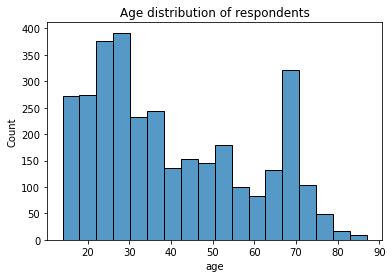

In [50]:
sns.histplot(x='age', data=df2).set_title("Age distribution of respondents")
plt.show()

The gender distribution is quite evenly split.

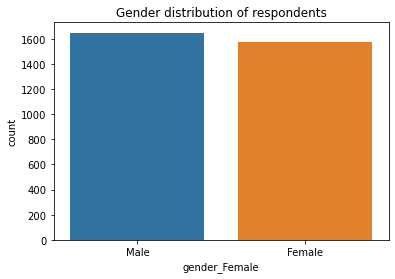

In [51]:
sns.countplot(x='gender_Female', data=df2).set_title("Gender distribution of respondents")
positions = (0, 1)
labels = ('Male', 'Female')
plt.xticks(positions, labels)
plt.show()

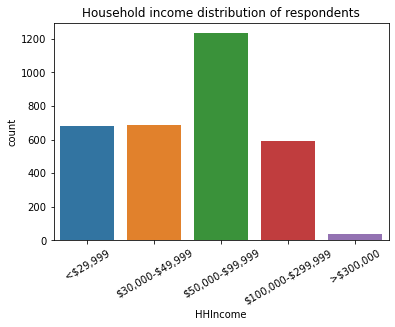

In [52]:
sns.countplot(x='HHIncome', data=df2).set_title("Household income distribution of respondents")
positions = (0, 1, 2, 3, 4)
labels = ('<$29,999', '\$30,000-\$49,999', '\$50,000-\$99,999', '\$100,000-\$299,999', '>$300,000')
plt.xticks(positions, labels)
plt.xticks(rotation = 30)
plt.show()

Next, explore the distribution of the target variable: "would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription. (e.g., reduced subscription cost by 25%)"

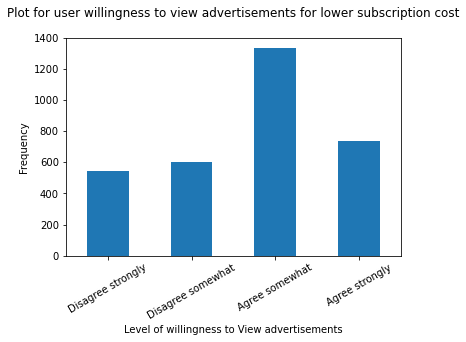

In [98]:
#Plot of the target variable
df2.target_willing.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Level of willingness to View advertisements')
plt.ylabel('Frequency')
plt.title('Plot for user willingness to view advertisements for lower subscription cost\n')
positions = (0, 1, 2, 3)
labels = ('Disagree strongly', 'Disagree somewhat', 'Agree somewhat', 'Agree strongly')
plt.xticks(positions, labels)
plt.xticks(rotation = 30)
plt.show()

Next, take a look at demographic characteristics of individuals who responded differently to this question.

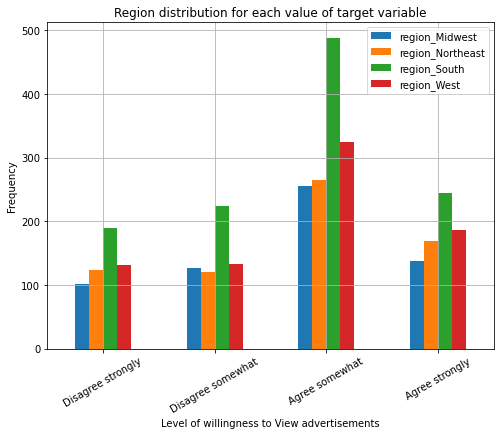

In [54]:
# Visualization between demographics and target variable
df_plot = df2[['target_willing','region_Midwest','region_Northeast','region_South','region_West']].groupby('target_willing').sum()
df_plot.plot.bar(title = 'Region distribution for each value of target variable', figsize = (8,6), grid = True)
plt.xlabel('Level of willingness to View advertisements')
plt.ylabel('Frequency')
plt.xticks(positions, labels)
plt.xticks(rotation = 30)
plt.show()

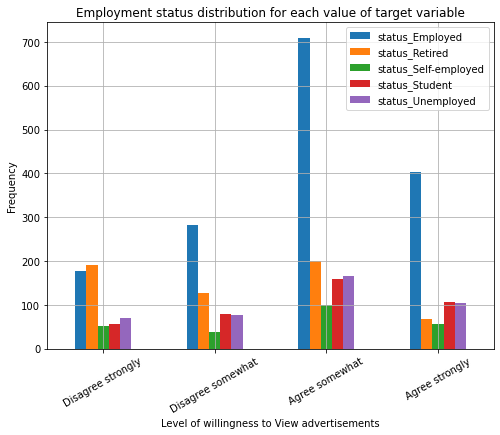

In [55]:
# Visualization between Employment status and target variable
df_plot = df2[['target_willing','status_Employed','status_Retired','status_Self-employed','status_Student','status_Unemployed']].groupby('target_willing').sum()
df_plot.plot.bar(title = 'Employment status distribution for each value of target variable', figsize = (8,6), grid = True)
plt.xlabel('Level of willingness to View advertisements')
plt.ylabel('Frequency')
plt.xticks(positions, labels)
plt.xticks(rotation = 30)
plt.show()

Interestingly, most of the people who are employed agree somewhat or agree strongly with watching advertisements with their streaming service for a reduced subscription fee. People who are retired, on the otherhand, show slightly more people disagreeing (somewhat or strongly) with the statement than agreeing. This suggests that people with an active income may actually be more price sensitive to subscription costs. Of course, other spurious factors may be at play, so this graph visualizing only two variables needs to be carefully interpreted.

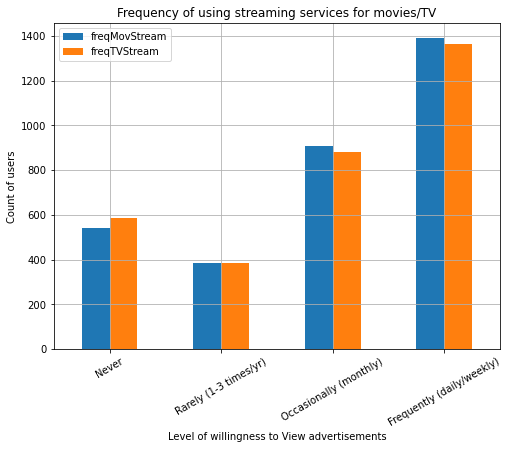

In [99]:
# Distribution of users who prefer streaming services for movies/TV across target variable
#temp_grp_df = df2[['target_willing','freqMovStream','freqTVStream']].groupby('target_willing').sum()
# temp_grp_df.plot.bar(title = 'Frequency of using streaming services for movies/TV', figsize = (8,6), grid = True)

#df2[['freqMovStream', 'freqTVStream']].plot.bar(title = 'Frequency of using streaming services for movies/TV', figsize = (8,6), grid = True)

a = df2['freqMovStream'].value_counts()
b = df2['freqTVStream'].value_counts()

temp = pd.concat([a, b], axis=1).sort_index() 

temp.plot.bar(title = 'Frequency of using streaming services for movies/TV', figsize = (8,6), grid = True)
plt.xlabel('Level of willingness to View advertisements')
plt.ylabel('Count of users') 
freq_labels = ('Never', 'Rarely (1-3 times/yr)', 'Occasionally (monthly)', 'Frequently (daily/weekly)')
plt.xticks(positions, freq_labels)
plt.xticks(rotation = 30)
plt.show()

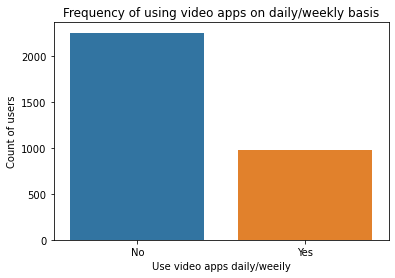

In [102]:
# Distribution of video apps users across target variable
#temp_grp_df = df2[['target_willing','useVideoApps']].groupby('target_willing').sum()
#temp_grp_df.plot.bar(title = 'Usage of video apps for each value of target variable', figsize = (8,6), grid = True)


sns.countplot(x = 'useVideoApps', data = df2).set_title('Frequency of using video apps on daily/weekly basis')
plt.xlabel('Use video apps daily/weeily')
plt.ylabel('Count of users')
pos = (0, 1)
lab = ('No', 'Yes')
plt.xticks(pos, lab)
plt.show()

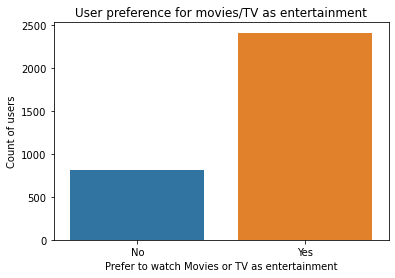

In [104]:
# Distribution of users with preference towards movie and TV as entertainment activities
#temp_grp_df = df2[['target_willing','prefMovieTV']].groupby('target_willing').sum()
#temp_grp_df.plot.bar(title = 'Distribution of movie/TV preferring users for each value of target variable', figsize = (8,6), grid = True)

sns.countplot(x = 'prefMovieTV', data = df2).set_title('User preference for movies/TV as entertainment')
plt.xlabel('Prefer to watch Movies or TV as entertainment')
plt.ylabel('Count of users')
plt.xticks(pos, lab)
plt.show()

From the above two plots we can see that a higher proportion of users perfer to watch movies/TV as entertainment, but a lower proportion uses video apps on their smartphone frequently. This is an opportunity to capture additional users by creating and marketing an easy-to-use smartphone app that enables users to watch movies/TV anywhere they go.

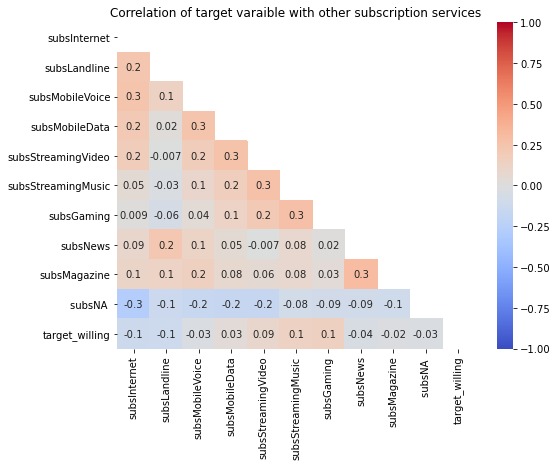

In [59]:
cols = [c for c in df2.columns if "subs" in c or c == "target_willing"]
df2_subs = df2[cols]
matrix = np.triu(df2_subs.corr())
plt.figure(figsize=(8, 6))
g = sns.heatmap(df2_subs.corr(), annot=True, mask=matrix,fmt='.1g',vmin=-1, vmax=1, center= 0,cmap= 'coolwarm')
g.set_title("Correlation of target varaible with other subscription services")
plt.show()

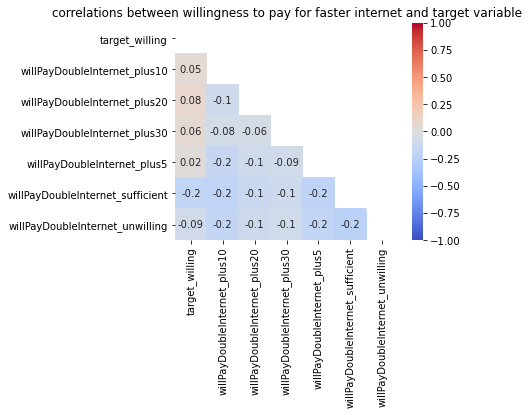

In [60]:
cols = [c for c in df2.columns if "willPayDoubleInternet" in c or c == "target_willing"]
df2_doubleInternet = df2[cols]
matrix = np.triu(df2_doubleInternet.corr())
plt.figure(figsize=(5, 4))
g=sns.heatmap(df2_doubleInternet.corr(), annot=True, mask=matrix,fmt='.1g',vmin=-1, vmax=1, center= 0,cmap= 'coolwarm')
g.set_title("correlations between willingness to pay for faster internet and target variable")
plt.show()

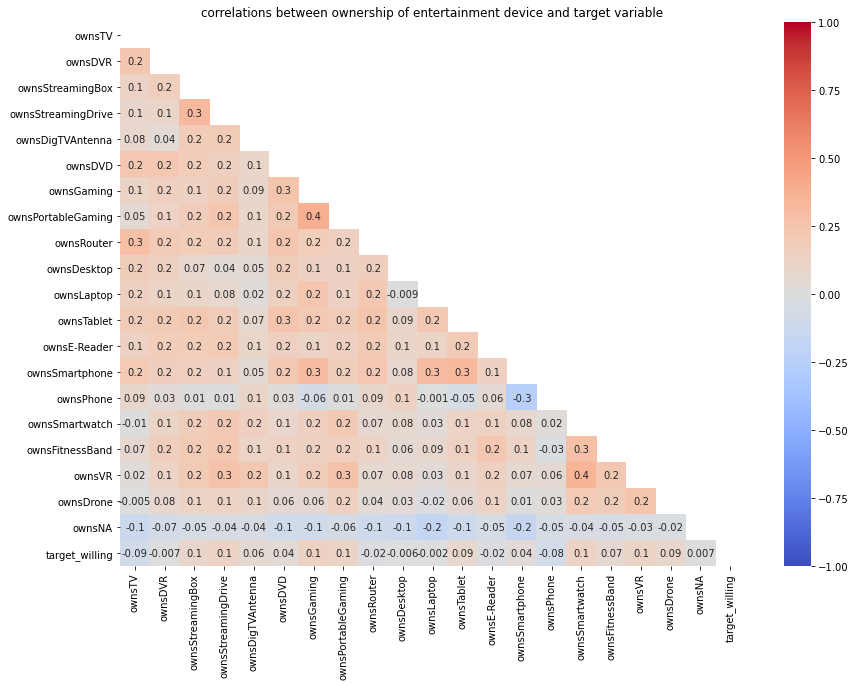

In [61]:
cols = [c for c in df2.columns if "owns" in c and c != 'ownsUnsure' or c == "target_willing"]
df2_owns = df2[cols]
matrix = np.triu(df2_owns.corr())
plt.figure(figsize=(14, 10))
g=sns.heatmap(df2_owns.corr(), annot=True, mask=matrix,fmt='.1g',vmin=-1, vmax=1, center= 0,cmap= 'coolwarm')
g.set_title("correlations between ownership of entertainment device and target variable")
plt.show()

From the above correlation plots, there does not seem to be a strong correlation between a user's willingness to watch ads for a lower streaming subscription fee and whether they have subscriptions for other services, whether they are willing to pay for faster internet, and whether they own different entertainment devices. 

### PCA

As the data has very high dimensionality, PCA will be used to reduce the dimensions prior to further modelling.

In [306]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [311]:
scaler = StandardScaler()

drop = [i for i in df2.columns if 'NA' in i or i == 'target_willing']
scaled_df = scaler.fit_transform(df2.drop(columns = drop + ['year']))

In [312]:
cov = PCA(n_components = 40)
cov.fit(scaled_df)

PCA(n_components=40)

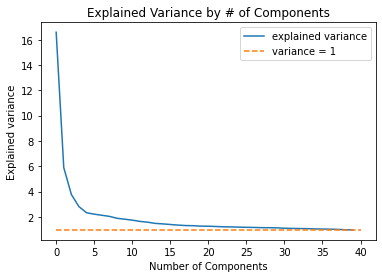

In [313]:
plt.plot(cov.explained_variance_, label = 'explained variance')
plt.plot([0, 40], [1, 1], '--', label = 'variance = 1')
plt.title('Explained Variance by # of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained variance')
plt.legend()

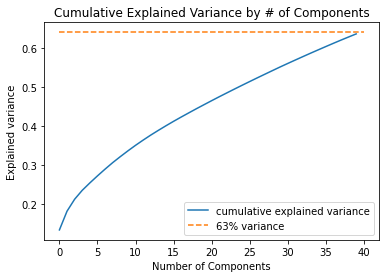

In [314]:
plt.plot(cov.explained_variance_ratio_.cumsum(), label = 'cumulative explained variance')
plt.plot([0, 40], [0.64, 0.64], '--', label = '63% variance')
plt.title('Cumulative Explained Variance by # of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained variance')
plt.legend()

From the above plots, we see that the % of variation explained by the top 5 components are the highest, with eigenvalues of above 2 each. The % variance per component between 5 and 30 components remain steady, with eigenvalues of between 1 and 2. As the second plot shows, with 40 total components, about 64% of total variance in the data is explained. The high number of components needed to explain the variance in the data is likely caused by the high number of dimensions in the original dataset, as well as the fact that survey responses with numeric coding is not necessarily standardized (questions have different survey response options that ultimately get coded into 0 through 5, for example). 

In order to retain the variance in the original dataset, 40 components will be used for modelling.

In [315]:
pca = PCA(n_components = 40)

In [316]:
pca_40 = pca.fit_transform(scaled_df)

In [317]:
loadings = pd.DataFrame(pca.components_, columns = df2.drop(columns = ['year'] + drop).columns)

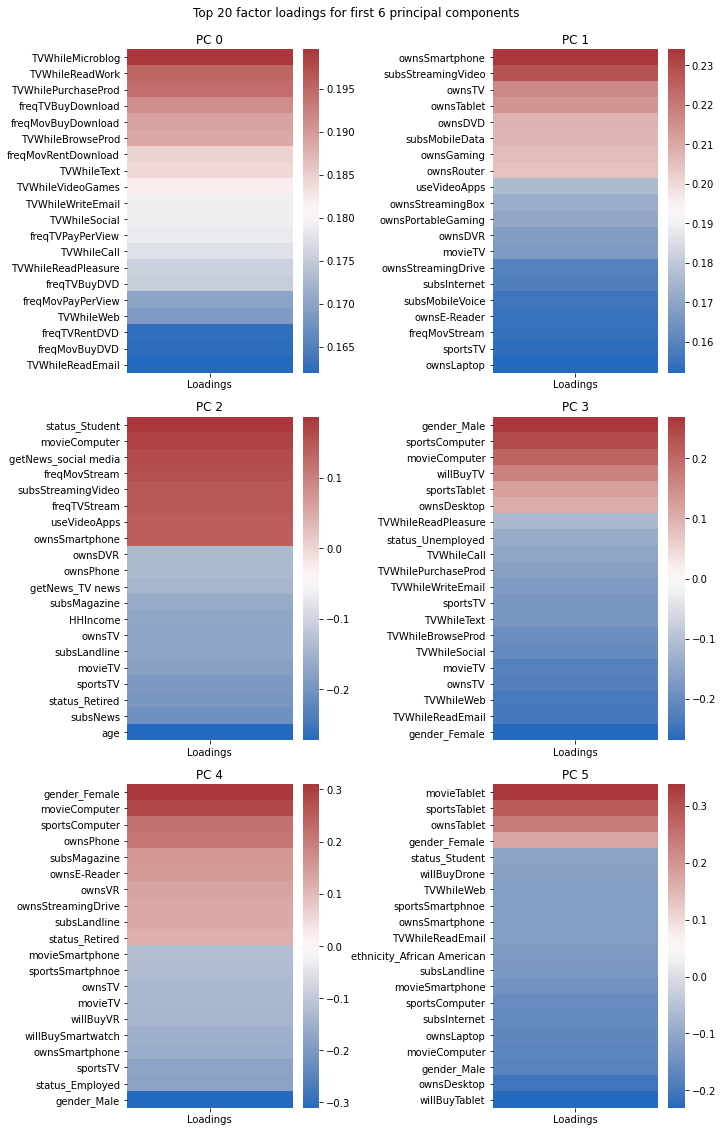

In [361]:
f = plt.figure(figsize =(10, 16))
for i in range(6):
    order = loadings.iloc[i, ].map(lambda x : x).abs().sort_values(ascending = False).index
    pc = pd.DataFrame({'Loadings': loadings.iloc[i, ][order][:20].values}, index = order[:20])
    pc.sort_values(by='Loadings', ascending=False, inplace=True)
    f.add_subplot(3, 2, i+1)
    p = sns.heatmap(pc, cmap = 'vlag')
    p.set_title("PC {}".format(i))
plt.suptitle('Top 20 factor loadings for first 6 principal components\n')
f.tight_layout()
plt.show()

In [319]:
f.clear()
plt.close(f)

As we can see, PC1 captures a lot of information about habits: whether people watch TV while multitasking, how frequently they watch entertainment through renting/buying DVDs, etc. It also captures whether respondents are willing to provide their information to receive more targeted ads. 

PC2 captures a lot of information on the types of entertainment devices that the respondent's household owns (laptop, TV, etc), as well as services they subscribe to.

PC3 captures some demographic information such as age, HH income, and employment status. It also captures some behavioral information like whether they get news from TV or from social media and whether they frequently stream movies/TV.

PC4 captures information about gender, along with some information about multitasking while watching TV. This component also captures plans to buy other entertainment devices (will buy TV or VR headset in the upcoming year). 

PC5 captures more information on plans to purchase entertainment devices and currently owned entertainment devices.

PC6 captures viewing habits on tablets (whether they own a tabletor plan to buy one, and whether they watch movies and sports on their tablet). Other relevant features are whether they watch movies on their smartphone, own a desktop, and stream TV frequently.

### Modelling

In [320]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix

In [321]:
y = df2['target_willing']

In [322]:
X_train, X_test, y_train, y_test = train_test_split(pca_40, y, test_size = 0.3, random_state = 42, stratify = y)

In [323]:
from sklearn.naive_bayes import GaussianNB

In [324]:
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)

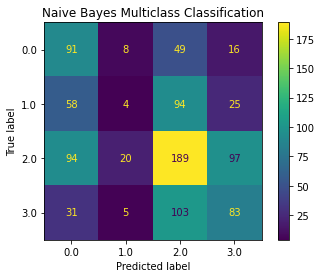

In [325]:
plot_confusion_matrix(NB, X_test, y_test)
plt.title("Naive Bayes Multiclass Classification")
plt.show()

In [326]:
print("Naive Bayes Multiclass Classification Report\n")
print(classification_report(y_test, y_pred))

Naive Bayes Multiclass Classification Report

              precision    recall  f1-score   support

         0.0       0.33      0.55      0.42       164
         1.0       0.11      0.02      0.04       181
         2.0       0.43      0.47      0.45       400
         3.0       0.38      0.37      0.37       222

    accuracy                           0.38       967
   macro avg       0.31      0.36      0.32       967
weighted avg       0.34      0.38      0.35       967



In [327]:
import xgboost as xgb

In [328]:
gb = xgb.XGBClassifier(num_class = 4, objective =  "multi:softmax", use_label_encoder=False, eval_metric = "error")

In [329]:
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [330]:
print("XGBoost Multiclass Classification Report\n")
print(classification_report(y_test, y_pred))

XGBoost Multiclass Classification Report

              precision    recall  f1-score   support

         0.0       0.42      0.29      0.35       164
         1.0       0.22      0.09      0.13       181
         2.0       0.45      0.69      0.54       400
         3.0       0.44      0.32      0.37       222

    accuracy                           0.43       967
   macro avg       0.38      0.35      0.35       967
weighted avg       0.40      0.43      0.39       967



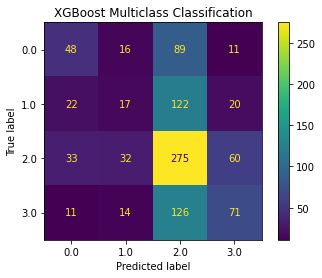

In [331]:
plot_confusion_matrix(gb, X_test, y_test)
plt.title("XGBoost Multiclass Classification")
plt.show()

In [332]:
from sklearn.ensemble import RandomForestClassifier

In [333]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [334]:
print("Random Forest Multiclass Classification Report\n")
print(classification_report(y_test, y_pred))

Random Forest Multiclass Classification Report

              precision    recall  f1-score   support

         0.0       0.52      0.29      0.37       164
         1.0       0.08      0.01      0.01       181
         2.0       0.44      0.86      0.59       400
         3.0       0.57      0.21      0.30       222

    accuracy                           0.46       967
   macro avg       0.40      0.34      0.32       967
weighted avg       0.42      0.46      0.38       967



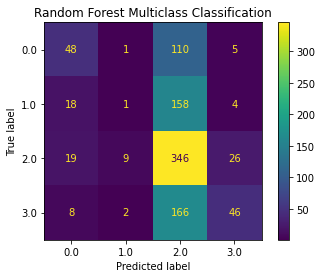

In [335]:
plot_confusion_matrix(rf, X_test, y_test)
plt.title("Random Forest Multiclass Classification")
plt.show()

#### Binary classification

Previous modelling performance is slightly better than random classification given 4 classes, but overall accuracy rate is not very high. To improve modelling performance, we will recode the outcome variable to be binary. Class 0 would represent people who disagree strongly or disagree somewhat with the statement (would not watch ads for a reduced subscription price), while 1 would represent people who agree somewhat or agree strongly with the statement (would watch ads for a reduced price).

In [336]:
y_new = df2['target_willing'].copy()

In [337]:
y_new.loc[y_new<=1] = 0
y_new.loc[y_new>=2] = 1

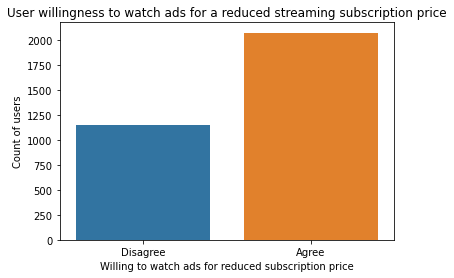

In [338]:
sns.countplot(x = y_new).set_title('User willingness to watch ads for a reduced streaming subscription price')
plt.xlabel('Willing to watch ads for reduced subscription price')
plt.ylabel('Count of users')
pos = (0, 1)
lab = ('Disagree', 'Agree')
plt.xticks(pos, lab)
plt.show()

The classes are somewhat imbalanced, so stratified sampling will be used when splitting the training and test datasets.

In [339]:
X_train, X_test, y_train, y_test = train_test_split(pca_40, y_new, test_size = 0.3, random_state = 42, stratify = y_new)

First, try a simple logistic regression model.

In [340]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty = 'l1', solver = 'saga')
logreg.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='saga')

In [341]:
y_pred = logreg.predict(X_test)
print("Logistic Regression Classification Report\n")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report

              precision    recall  f1-score   support

         0.0       0.60      0.41      0.49       345
         1.0       0.72      0.85      0.78       622

    accuracy                           0.69       967
   macro avg       0.66      0.63      0.63       967
weighted avg       0.68      0.69      0.68       967



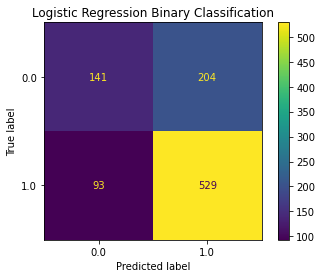

In [342]:
plot_confusion_matrix(logreg, X_test, y_test)
plt.title("Logistic Regression Binary Classification")
plt.show()

In [343]:
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)

In [344]:
print("Naive Bayes Binary Classification Report\n")
print(classification_report(y_test, y_pred))

Naive Bayes Binary Classification Report

              precision    recall  f1-score   support

         0.0       0.47      0.53      0.50       345
         1.0       0.72      0.67      0.69       622

    accuracy                           0.62       967
   macro avg       0.60      0.60      0.60       967
weighted avg       0.63      0.62      0.63       967



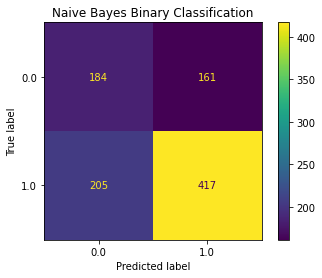

In [345]:
plot_confusion_matrix(NB, X_test, y_test)
plt.title("Naive Bayes Binary Classification")
plt.show()

In [346]:
gb = xgb.XGBClassifier(use_label_encoder=False, eval_metric = "logloss", random_state = 4)

In [347]:
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print("XGBoost Binary Classification Report\n")
print(classification_report(y_test, y_pred))

XGBoost Binary Classification Report

              precision    recall  f1-score   support

         0.0       0.55      0.39      0.46       345
         1.0       0.71      0.82      0.76       622

    accuracy                           0.67       967
   macro avg       0.63      0.61      0.61       967
weighted avg       0.65      0.67      0.65       967



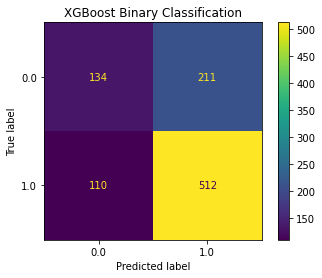

In [348]:
plot_confusion_matrix(gb, X_test, y_test)
plt.title("XGBoost Binary Classification")
plt.show()

In [349]:
rf = RandomForestClassifier(random_state = 4)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [350]:
print("Random Forest Classification Report\n")
print(classification_report(y_test, y_pred))

Random Forest Classification Report

              precision    recall  f1-score   support

         0.0       0.61      0.28      0.38       345
         1.0       0.69      0.90      0.78       622

    accuracy                           0.68       967
   macro avg       0.65      0.59      0.58       967
weighted avg       0.66      0.68      0.64       967



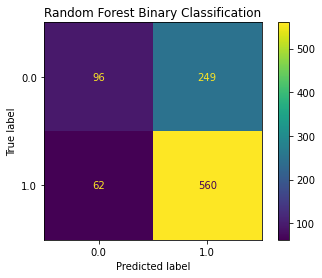

In [351]:
plot_confusion_matrix(rf, X_test, y_test)
plt.title("Random Forest Binary Classification")
plt.show()

In [352]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(learning_rate='adaptive', max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', max_iter=1000)

In [353]:
y_pred = mlp.predict(X_test)

In [354]:
print("MLP Classifier Classification Report\n")
print(classification_report(y_test, y_pred))

MLP Classifier Classification Report

              precision    recall  f1-score   support

         0.0       0.48      0.43      0.45       345
         1.0       0.70      0.73      0.72       622

    accuracy                           0.63       967
   macro avg       0.59      0.58      0.59       967
weighted avg       0.62      0.63      0.62       967



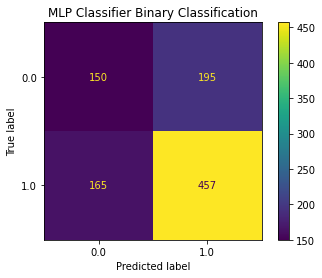

In [355]:
plot_confusion_matrix(mlp, X_test, y_test)
plt.title("MLP Classifier Binary Classification")
plt.show()

In [356]:
# setup for ROC curves
models = [NB,
          gb, 
         rf,
         mlp,
         logreg]

result_table = pd.DataFrame(columns=['classifier', 'fpr','tpr','auc'])

for model in models:
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifier':model.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [357]:
result_table.set_index('classifier', inplace=True)

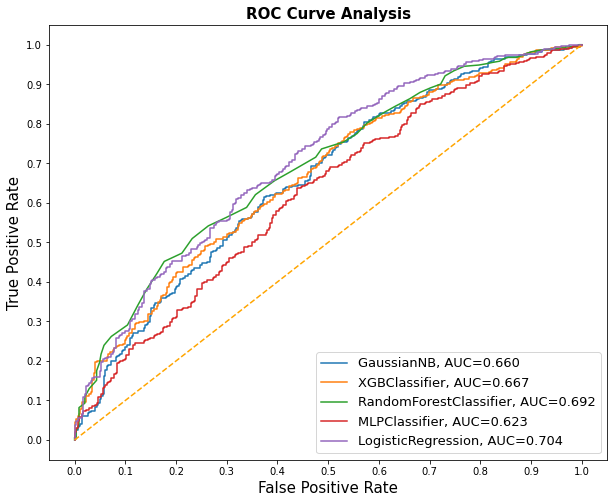

In [358]:
fig = plt.figure(figsize=(10,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

As we can see, Logistic Regression achieved the best AUC score of 0.7, followed closely by RandomForest at 0.69.

Next, the random forest model will be used to evaluate feature importance.

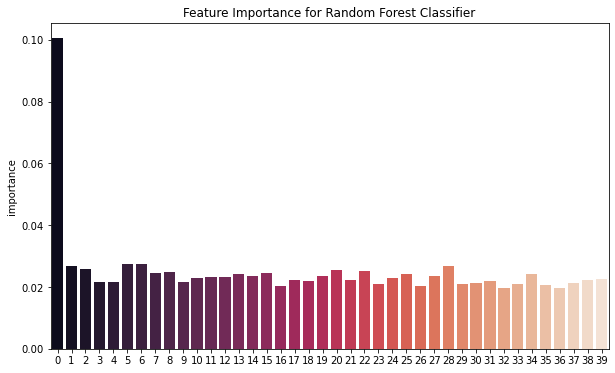

In [359]:
rf_importance = pd.DataFrame(np.abs(rf.feature_importances_), index = [x for x in range(len(np.abs(rf.feature_importances_)))])
rf_importance.rename(columns = {0: 'importance'}, inplace=True)
rf_importance.sort_values(by = 'importance', ascending = False)
plt.figure(figsize=(10, 6))
plt.title("Feature Importance for Random Forest Classifier")
sns.barplot(y = 'importance', x = rf_importance.index, data = rf_importance, palette='rocket')
plt.show()

As we can see, the first principal component (component 0) has the highest feature importance. This is the component that captures TV watching habits. All other components have very similar importance scores.